# Homework #1

Robert Rash

CSE 5330

5 September 2018

## Problem #1

If Amazon.com kept all of its data (i.e. 42 TB) on Hollerith 80 column punched cards, how long would it take to read all of the data if you used an IBM 2540 card reader which could read 1000 cards per minute?

### Solution

**Assumptions:**

* TB is the base 10 unit, so 1 TB = $1.0\mathrm{e}{+12}$ bytes
* Each "punch" is equivalent to 1 bit on modern systems.

Hollerith 80-column cards are made up of 12 rows and 80 columns, meaning there are 960 "punches". Given the assumption above, each card therefore can contain 960 bits.

$$
12\textrm{ rows} \times 80\textrm{ columns} = 960\textrm{ bits}
$$

The IBM 2540 card reader can read 1000 cards per minute (CPM). Given that each card contains 960 bits, the effective bit rate is

$$
\frac{1000\textrm{ cards}}{1\textrm{ min}} \times \frac{1\textrm{ min}}{60\textrm{ sec}} \times \frac{960\textrm{ bits}}{1\textrm{ card}} = 16000\textrm{ bps} = 16\textrm{ kbps}
$$

Amazon's 42 terabytes is equivalent to $4.2\mathrm{e}{+10}$ kilobytes.

$$
\frac{4.2\mathrm{e}{+10}\textrm{ kilobytes}}{16\textrm{ kbps}} = 2.625\mathrm{e}{+9}\textrm{ sec} = 83.24\textrm{ years}
$$

## Problem #2

Consider a disk with a sector size of 512 bytes, 1000 tracks per surface, 400 sectors per track, 5 double-sided platters, average seek time of 6 milliseconds. Suppose that a file containing 100,000 records of 200 bytes each is to be stored on such a disk and that no record is allowed to span two sectors. Assume the disk rotates at 10,000 RPM and one track of data can be transferred per rotation.

    a. How many records fit into one sector?
    b. How many sectors are required to store the entire file? If the file is arranged sequentially on disk, how many surfaces are needed?
    c. What is the maximum number of 200 byte records that can be stored using this disk?
    d. What is the time required to completely read the entire disk? Assume ideal circumstances.

### Solution

Total # platters: 5 platters

Total # surfaces: $5 \textrm{ platters} \times 2 \textrm{ surfaces per platter} = 10 \textrm{ surfaces}$

Total # tracks: $10 \textrm{ surfaces} \times 1000 \textrm{ tracks per surface} = 10000 \textrm{ tracks}$

Total # sectors: $10000 \textrm{ tracks} \times 400 \textrm{ sectors per track} = 4\mathrm{e}{+6} \textrm{ sectors}$

\# of sectors per surface: $1000 \textrm{ tracks per surface} \times 400 \textrm{ sectors per track} = 4\mathrm{e}{+5} \textrm{ sectors per surface}$

Total storage capacity: $4\mathrm{e}{+6} \textrm{ sectors} \times 512 \textrm{ bytes per sector} = 2.048\mathrm{e}{+9} \textrm{ bytes} = 2048 \textrm{ megabytes}$

> a. How many records fit into one sector?

Since no record is allowed to span two sectors, each sector can contain a maximum of two records.

> b. How many sectors are required to store the entire file? If the file is arranged sequentially on disk, how many surfaces are needed?

There are $1\mathrm{e}{+5} \textrm{ records}$ with a rate of $2 \textrm{ records per sector}$. The number of sectors needed to store the file is

$$
\frac{1\mathrm{e}{+5} \textrm{ records}}{2 \textrm{ records per sector}} = 50000 \textrm{ sectors}
$$

Each surface contains $4\mathrm{e}{+5} \textrm{ sectors}$. The number of surfaces needed to store the file is

$$
\frac{4\mathrm{e}{+5} \textrm{ sectors per surface}}{50000 \textrm{ sectors in file}} = 8 \textrm{ surfaces}
$$

> c. What is the maximum number of 200 byte records that can be stored using this disk?

Given that the records are 200 bytes, that each sector is 512 bytes, and that no records can span a sector, each sector can contain a maximum of 2 records. There are $4\mathrm{e}{+6} \textrm{ sectors}$ on the disk, so the maximum number of 200 byte records that can be stored on this disk is

$$
4\mathrm{e}{+6} \textrm{ sectors} \times 2 \textrm{ records per sector} = 8\mathrm{e}{+6} \textrm{ records}
$$

> d. What is the time required to completely read the entire disk? Assume ideal circumstances.

For this situation, ideally, the read would be sequential from the first sector on the first track on the first surface, with the read head already located at this first sector.

Since there are 10000 tracks on the entire disk, the disk spins at 10000 RPM, and that one track can be read per rotation, this means that it would take 1 minute to read the entire disk under the ideal circumstances.

$$
\frac{10000 \textrm{ tracks}}{1 \textrm{ disk}} \times \frac{1 \textrm{ rotation}}{1 \textrm{ track}} \times \frac{1 \textrm{ minute}}{10000 \textrm{ rotations}} = \frac{10000 \textrm{ tracks read}}{10000 \textrm{ rotations}} = 1 \textrm{ minute}
$$


## Problem #3

PC Magazine has a [list of 10 web hosting companies](https://www.pcmag.com/article2/0,2817,2424725,00.asp). Does TMDHosting support MySQL databases? What about Dreamhost? What did you look at to determine your answer?

### Solution

> Does TMDHosting support MySQL databases?

Yes, TMDHosting supports MySQL databases through its CPanel.

> What about Dreamhost?

Yes, Dreamhost supports MySQL databases through its administration panel.

> What did you look at to determine your answer?

For TMDHosting, the answer was found [here](https://www.tmdhosting.com/kb/question/create-a-database-in-cpanel/) (https://www.tmdhosting.com/kb/question/create-a-database-in-cpanel/).

For Dreamhost, the answer was found [here](https://help.dreamhost.com/hc/en-us/articles/221691727-Creating-a-MySQL-database) (https://help.dreamhost.com/hc/en-us/articles/221691727-Creating-a-MySQL-database).

## Problem #4

Suppose we have a sequential ordered file of 200,000 records, where each record is 200 bytes. Assume blocksize = 2048 bytes (10 records per block), average seek time = 10 ms, average rotational delay = 8.3 ms, and block transfer time = 0.8 ms. Suppose we want to make $X$ independent random record reads from the file. This could be done in two different approaches.

    1.   Read the entire file once and look for the $X$ records of interest
    2.   Use a binary search to find a particular record, and repeat this for all X records of interest.
    
The question is to decide when it would be more efficient to perform approach 1 versus approach 2. That is, what is the value for $X$ when an exhaustive read of the file is more efficient than $X$ random reads? Develop this as a function of $X$. Show your work! (A graph would be helpful.)

### Solution

$$
\textrm{Total # records } \rightarrow R = 2\mathrm{e}{+5} \textrm{ records}\\
\textrm{Record size } \rightarrow s_r = 200 \textrm{ bytes}\\
\textrm{Block size } \rightarrow s_b = 2048 \textrm{ bytes}\\
\textrm{Avg. seek time } \rightarrow \overline{t_s} = 10 \textrm{ ms}\\
\textrm{Avg. rotational delay } \rightarrow \overline{t_{rd}} = 8.3 \textrm{ ms}\\
\textrm{Block transfer time } \rightarrow t_{bt} = 0.8 \textrm{ ms}\\
$$

$$
\textrm{Records per block } \rightarrow r_b = \left\lfloor\frac{s_b}{s_r}\right\rfloor = \left\lfloor\frac{2048 \textrm{ bytes per block}}{200 \textrm{ bytes per record}}\right\rfloor = 10 \textrm{ records per block}\\
\textrm{Total # of blocks } \rightarrow B = \frac{R}{r_b} = \frac{2\mathrm{e}{+5} \textrm{ records}}{10 \textrm{ records per block}} = 20000 \textrm{ blocks}
$$

Sequential search as a function of $X$ can be represented by
$$
f_s(X) = X t_{bt} + B(\overline{t_s} + \overline{t_{rd}})
$$

For sequential search, the number of records of interest is multiplied by the block transfer time. This is added to the quantity of the seek time and the rotational delay multiplied by the total number of blocks (since _all_ blocks must be read once).

Binary search as a function of $X$ can be represented by
$$
f_b(X) = X t_{bt}(\log_2 (B) + (\overline{t_s} + \overline{t_{rd}}))
$$

For binary search, the number of records of interest is multiplied by the block transfer time. This quantity is then multiplied by the base 2 logarithm of the total number of blocks, representing the time it takes for one complete binary search multiplied by $X$ records and the total amount of time to transfer those blocks for those $X$ records, as well as the seek time and rotational delay for each record $X$. 

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
    'font.family': 'Helvetica, Arial, sans-serif'
})

Populating the interactive namespace from numpy and matplotlib


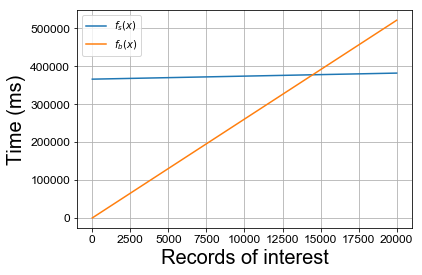

In [13]:
import numpy as np

records = 20001

B    = 20000
t_bt = 0.8
t_s  = 10
t_rd = 8.3

def binary_search(x):
    return x * t_bt * (np.log2(B) + (t_s + t_rd))
    
def sequential_search(x):
    return x * t_bt + (B * (t_s + t_rd))

data = {}
data['x'] = [x for x in range(1,records)]
data['seq'] = [sequential_search(x) for x in data['x']]
data['bin'] = [binary_search(x) for x in data['x']]

pylab.plot(data['x'], data['seq'])
pylab.plot(data['x'], data['bin'])

pylab.title('')
pylab.xlabel('Records of interest')
pylab.ylabel('Time (ms)')
pylab.grid()

pylab.legend(('$f_s(x)$',
             '$f_b(x)$'))

As the graph above shows, as the number of records of interest $X$ increases, binary search becomes less efficient compared to an exhaustive search.

The exact point where this becomes so can be found by finding the intersection of the two lines above:

$$
f_s(X) = f_b(X)\\
X t_{bt} + B(\overline{t_s} + \overline{t_{rd}}) = X t_{bt}(\log_2 (B) + (\overline{t_s} + \overline{t_{rd}}))\\
0.8 \cdot X + 366000 = 26.0701699 \cdot X\\
26.0701699 \cdot X - 0.8 \cdot X = 366000\\
25.2701699 \cdot X = 366000\\
\rightarrow X = 14483.47999
$$

Therefore, once a search exceeds 14,483 records, binary search becomes less efficient than an exhaustive search.

## Problem #5

A file with Part# as the hash key incudes records with the following Part# values: 2368, 3760, 4692, 4871, 5659, 1821, 1074, 7115, 1620, 2428, 3943, 4750, 6975, 4981, and 9208. The file uses 4 buckets, numbered 0 to 3. Each bucket is one disk sector and holds four records and appropriate pointer values. Load these records into the file in the given order, using the hash function $h(k) = k \bmod 4$.

    a) Draw the diagram showing the final loading of the data into buckets.
    b) Calculate the average number of sector accesses for any random retrieval on Part#.

### Solution

> a) Draw the diagram showing the final loading of the data into buckets.


In [38]:
n = [2368, 3760, 4692, 4871, 5659, 1821, 1074, 7115, 1620, 2428, 3943, 4750, 6975, 4981, 9208]
z = {str(x): [] for x in range(4)}
for i in n:
    z[str(i % 4)].append(i)
    
for k,v in z.items():
    print(k,v)

0 [2368, 3760, 4692, 1620, 2428, 9208]
1 [1821, 4981]
2 [1074, 4750]
3 [4871, 5659, 7115, 3943, 6975]


![bucket_diagram](./img/bucket_diagram.png)

Note: items marked with $(*)$ represent overflow, since each bucket holds four records.

> b) Calculate the average number of sector accesses for any random retrieval on Part#.

$$
\textrm{Total # of records } \rightarrow R = 15 \textrm{ records}\\
\textrm{Total # of overflow values } \rightarrow V_O = 3 \textrm{ records}\\
\textrm{Total # of values, sans overflow } \rightarrow V = R - V_O = 12 \textrm{ records}\\
\textrm{# block accesses for non-overflow value } \rightarrow b_a = 1 \textrm{ block access}\\
\textrm{# block accesses for overflow value } \rightarrow b_{ao} = 2 \textrm{ block accesses}
$$

Average number of sector accesses:

$$
\left(\frac{b_a V}{R}\right) + \left(\frac{b_{ao} V_O}{R}\right) = \left(\frac{1 \cdot 12}{15}\right) + \left(\frac{2 \cdot 3}{15}\right) = 0.8 + 0.4 = 1.2 \textrm{ sector accesses on average}
$$

## Problem #6

I have a set of 100,000 random integers. How long does it take to determine the maximum value within the first 25,000, 50,000 and 100,000 integers? You may use any programming language/technique. It is possible the time will be very small, so you might need to repeat the experiment N times and determine an average value for time. Complete this table. Source code is not needed.

|      Number     | Time |
|:---------------:|:----:|
|      25,000     |      |
|      50,000     |      |
|     100,000     |      |
| Technique used: |      |
|   Assumptions:  |      |

### Solution

**Results**

|  Number |      Time (sec)      |
|:-------:|:--------------------:|
|  25,000 | 0.015701663494110108 |
|  50,000 |  0.03136679172515869 |
| 100,000 |  0.06246159076690674 |

**Assumptions**

None

**Technique**

I used an iterative technique where I kept track of the current index (line number) of the file and compared each line's value with a rolling maximum value. This process iterates 100 times, storing the time taken at each stopping point (i.e. 25,000, 50,000, and 100,000) in order to later derive an average time.

See Python code below for implementation

In [33]:
import time

file_path = '../data/n100000.csv'

avg_25k = 0.0
avg_50k = 0.0
avg_100k = 0.0

for i in range(0,100):
    line = 0
    max_int = 0
    start = time.time()
    with open(file_path) as f:
        for l in f:
            if int(l,10) >= max_int:
                max_int = int(l,10)

            line += 1

            if line == 24999:
                avg_25k += time.time() - start
            elif line == 49999:
                avg_50k += time.time() - start
            elif line == 100000:
                avg_100k += time.time() - start

time_25k  = avg_25k / 100
time_50k  = avg_50k / 100
time_100k = avg_100k / 100

print(time_25k, time_50k, time_100k)

0.01625011205673218 0.03250824689865112 0.06497139692306518


## Problem #7

Assume you have sufficient space and resources, how long would it take to copy a 1 TB file from an external drive connected to a USB port to your computer? State your assumptions.

### Solution

**Assumptions:**

* TB is the base 10 unit, so 1 TB = $1\mathrm{e}{+13}$ bytes
* Device uses USB 3.1 (Gen 2) with a read speed of 550 MBps (megabytes per second)



$$
1\textrm{ terabyte} = 1\mathrm{e}{+6}\textrm{ megabytes}
$$

Read speed is 550 MBps, so

$$
\frac{1\mathrm{e}{+6}\textrm{ megabytes}}{550\textrm{ MBps}} = 1818.182\textrm{ seconds} = 30.3\textrm{ minutes}
$$
